<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/customersegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/customer_segments.csv")

In [ ]:
df.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [ ]:
df.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

,0
name,0
age,0
gender,0
education,0
income,0
country,0
purchase_frequency,0
spending,0


In [ ]:
sns.set_style("whitegrid")

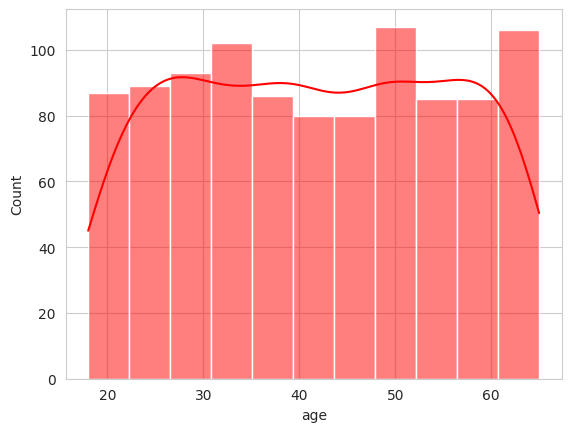

In [ ]:
sns.histplot(data=df, x="age", color="red", kde=True)
plt.show()

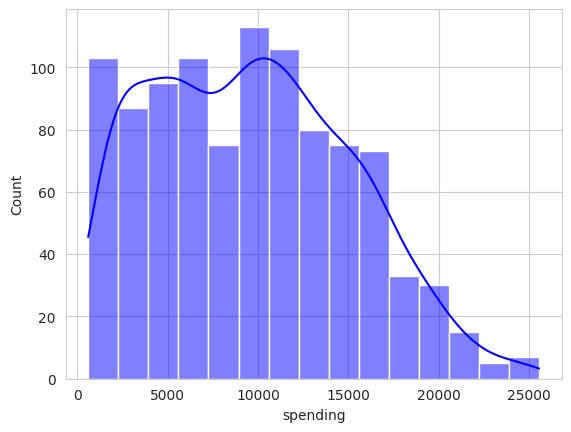

In [ ]:
sns.histplot(data=df, x="spending", color="blue", kde=True)
plt.show()

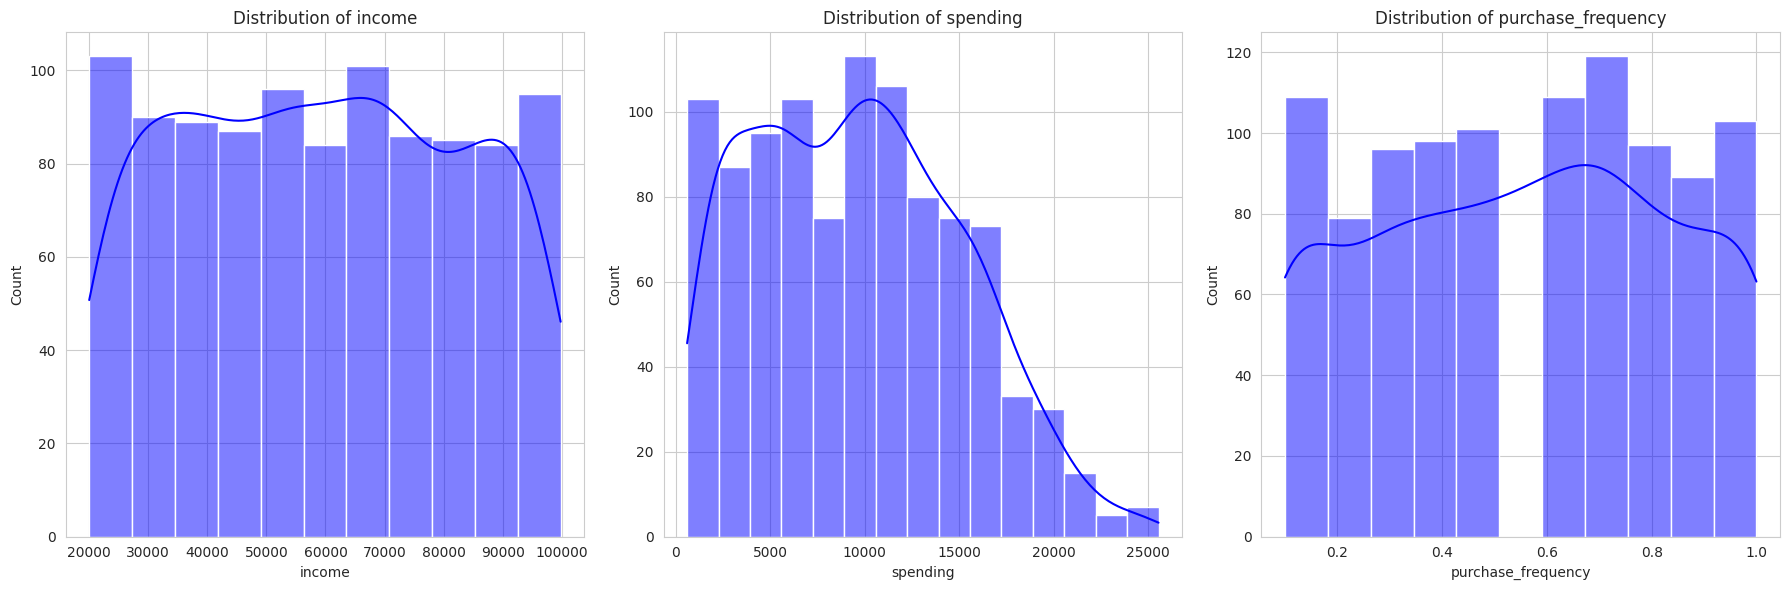

In [ ]:
cols=["income","spending","purchase_frequency"]
fig, axes = plt.subplots(1, len(cols), figsize=(18, 6))

for i, col in enumerate(cols):
  sns.histplot(data=df, x=col, color="blue", kde=True, ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

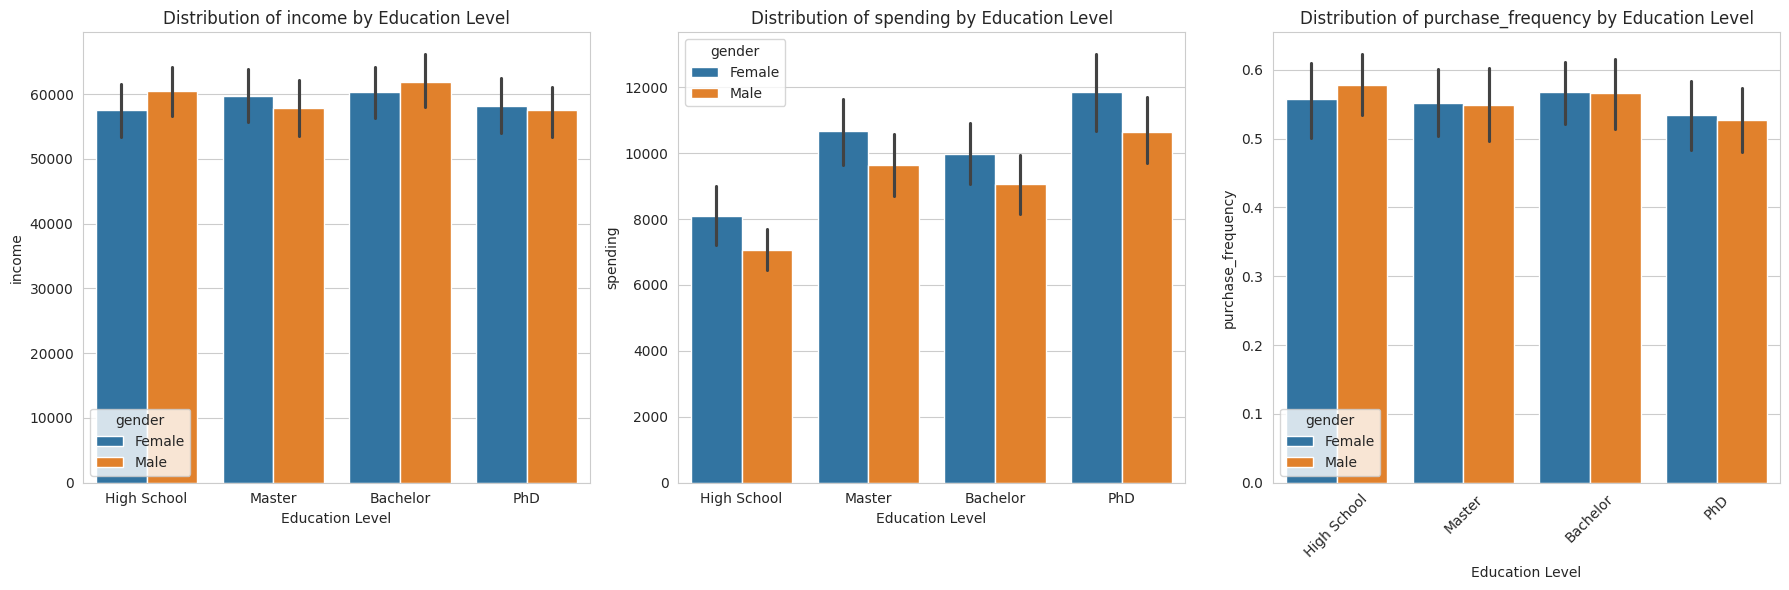

In [ ]:
fig, axes= plt.subplots(1, len(cols), figsize=(18,6))
for i, col in enumerate(cols):
  sns.barplot(data=df, x="education", y=col, ax=axes[i], hue="gender")
  axes[i].set_title(f'Distribution of {col} by Education Level')
  axes[i].set_xlabel('Education Level')
  axes[i].set_ylabel(col)
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
axes

array([<Axes: xlabel='education', ylabel='income'>,
       <Axes: xlabel='education', ylabel='spending'>,
       <Axes: xlabel='education', ylabel='purchase_frequency'>],
      dtype=object)

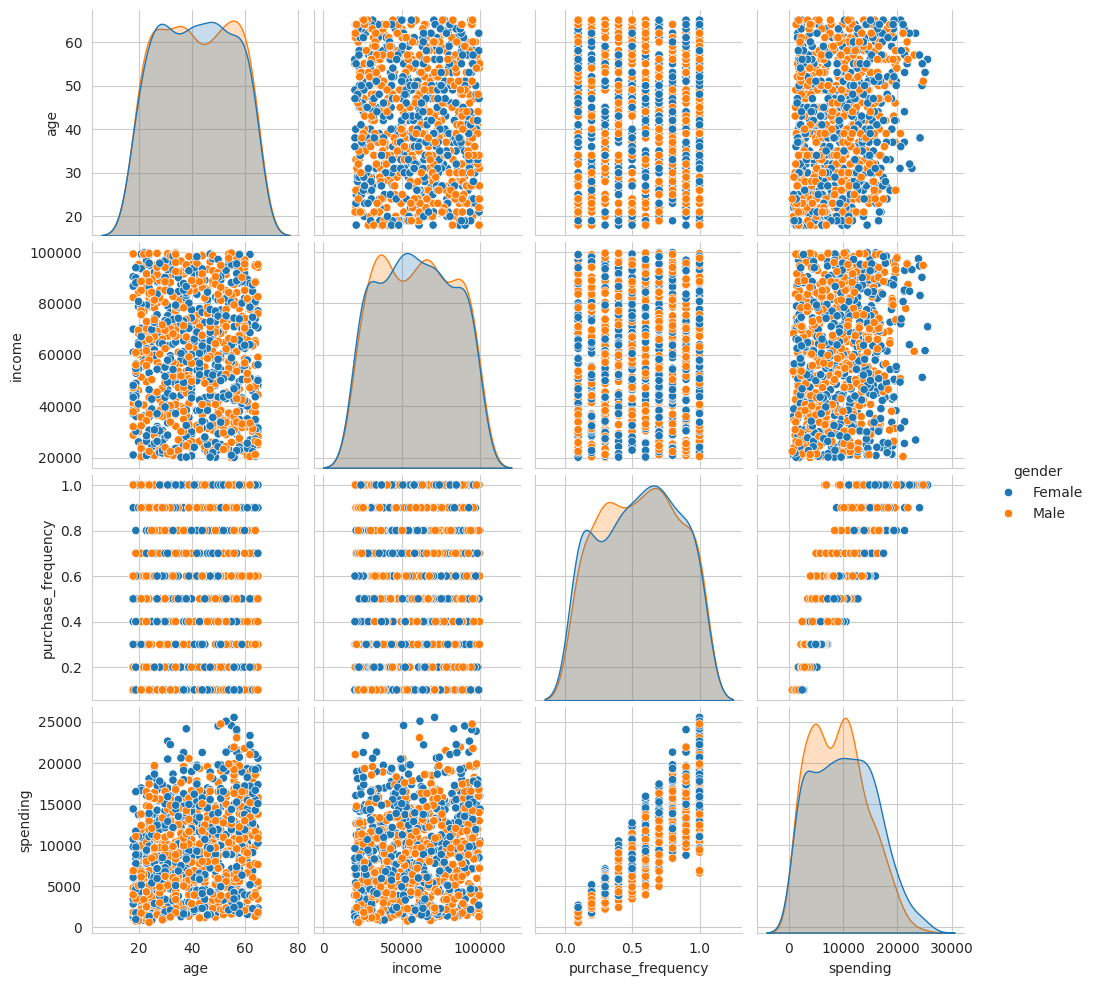

In [ ]:
sns.pairplot(data=df, hue="gender")
plt.show()

In [ ]:
X=df.drop("purchase_frequency", axis=1)
y=df["purchase_frequency"]

In [ ]:
# prompt: train it on linear regression by encoding gender and eductaion

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns to be encoded
categorical_features = ['gender', 'education', 'country', 'name']

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Apply the preprocessing to the features (X)
X_processed = preprocessor.fit_transform(X)

# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model (optional)
score = model.score(X_test, y_test)
print(f'Model R-squared score on test data: {score}')

Model R-squared score on test data: 0.9218517170091318


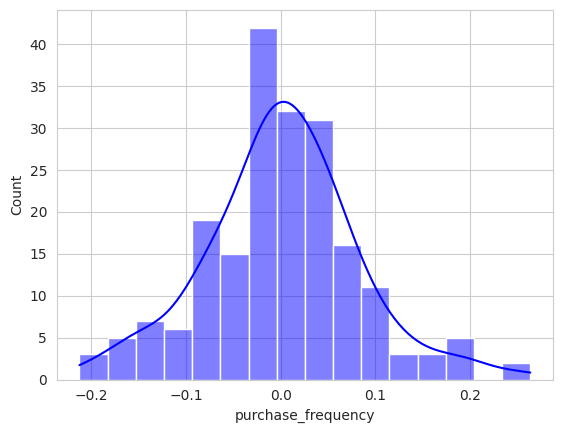

In [ ]:
residuals=y_test-model.predict(X_test)
sns.histplot(residuals, kde=True, color="Blue")
plt.show()

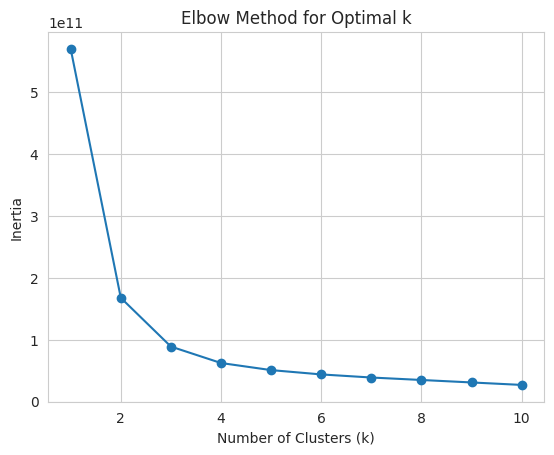

In [ ]:
X=df[["age","income","spending"]].values

k_values= list(range(1,11))
inertia_values=[]

from sklearn.cluster import KMeans

for k in k_values:
  kmeans=KMeans(n_clusters=k,random_state=42,n_init=10) # Added n_init for KMeans
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

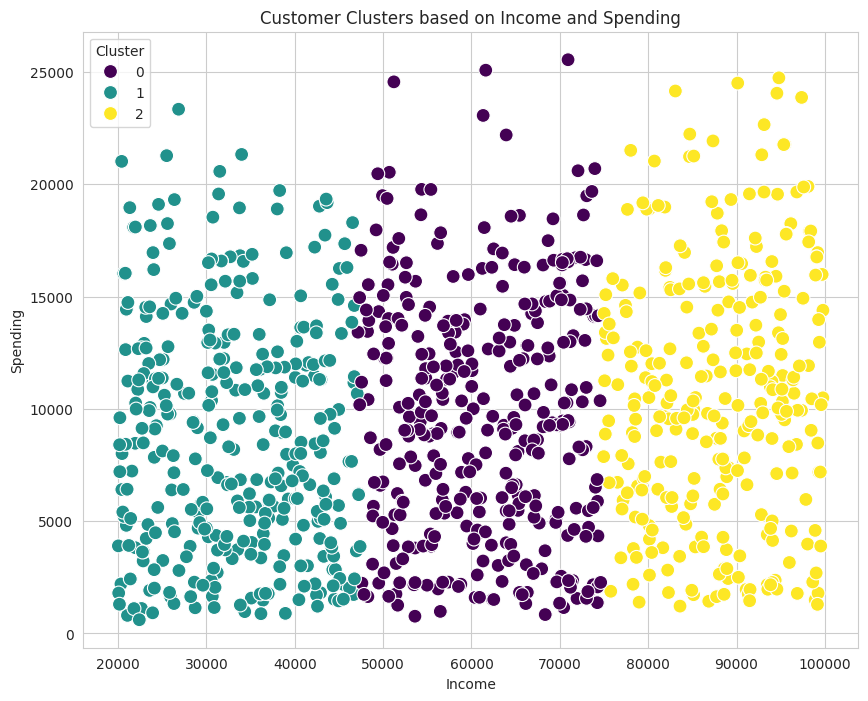

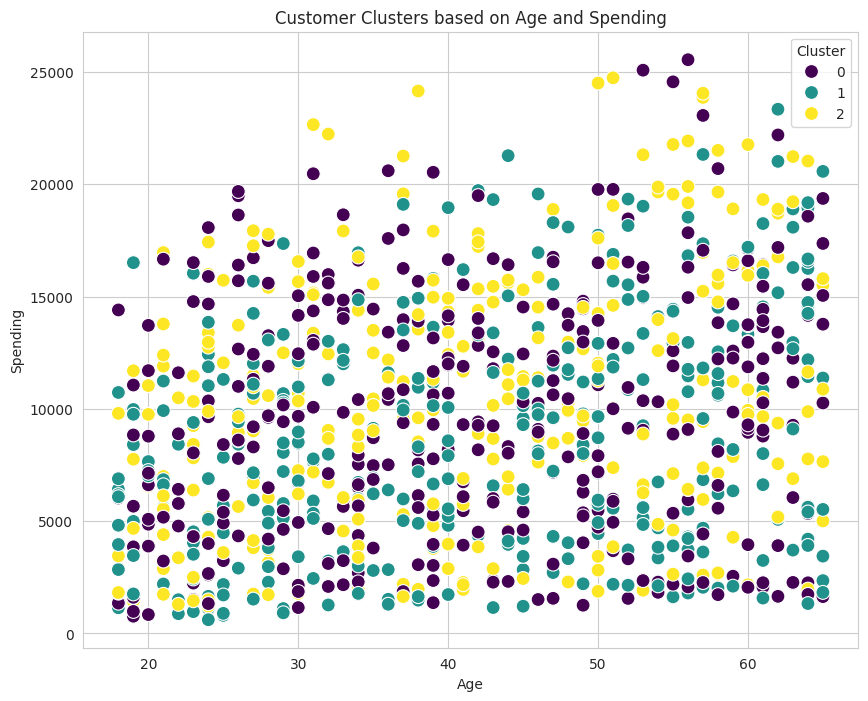

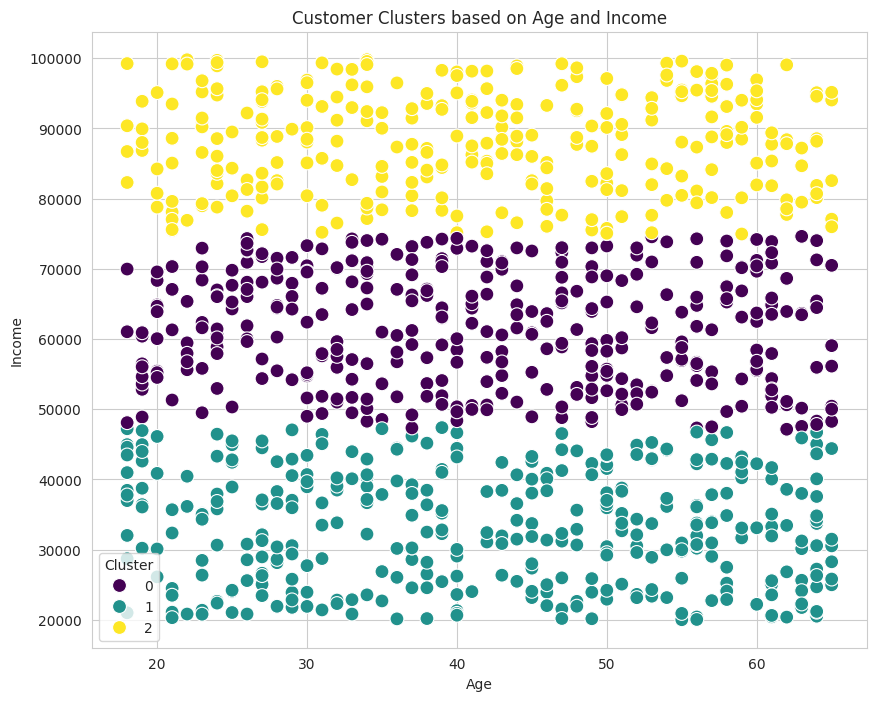

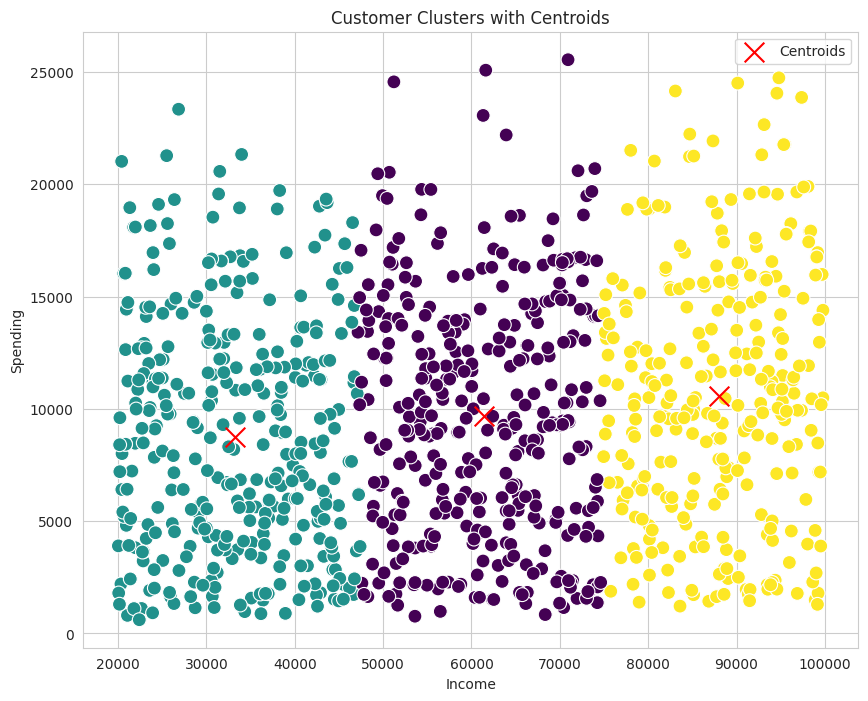

In [ ]:
import matplotlib.pyplot as plt

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="income", y="spending", hue="cluster", palette="viridis", s=100)
plt.title('Customer Clusters based on Income and Spending')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="age", y="spending", hue="cluster", palette="viridis", s=100)
plt.title('Customer Clusters based on Age and Spending')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="age", y="income", hue="cluster", palette="viridis", s=100)
plt.title('Customer Clusters based on Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()

# You can also visualize the centroids
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="income", y="spending", hue="cluster", palette="viridis", s=100, legend=False)
plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=200, c='red', label='Centroids')
plt.title('Customer Clusters with Centroids')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend()
plt.show()

In [ ]:
df.to_csv('customer_segments.csv', index = False)